In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import datetime
import seaborn as sns
#import pandasql as pds
from datetime import datetime,timedelta
from dateutil import parser
from statsmodels.tsa.arima_model import ARIMA
#from fbprophet import Prophet
import statsmodels

ImportError: cannot import name TimeSeries

In [4]:
statsmodels.__version__

'0.8.0.dev0+302c2ec'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'Analytics Vidhya.ipynb',
 'hackathon details.txt',
 'Master.csv',
 'sample_submission_1.zip',
 'saple submission',
 'Test',
 'test_8uviCCm.zip',
 'Train',
 'train_OwBvO8W.zip']

In [3]:
price_sales_promotion=pd.read_csv("Train/price_sales_promotion.csv")
historical_volume=pd.read_csv("Train/historical_volume.csv")
weather=pd.read_csv("Train/weather.csv")
industry_soda_sales=pd.read_csv("Train/industry_soda_sales.csv")
event_calendar=pd.read_csv("Train/event_calendar.csv")
industry_volume=pd.read_csv("Train/industry_volume.csv")
demographics=pd.read_csv("Train/demographics.csv")

In [4]:
price_sales_promotion.head(5)

,Agency,SKU,YearMonth,Price,Sales,Promotions
0,Agency_01,SKU_01,201301,1141.500000,1033.432731,108.067269
1,Agency_01,SKU_01,201302,1141.500000,1065.417195,76.082805
2,Agency_01,SKU_01,201303,1179.345820,1101.133633,78.212187
3,Agency_01,SKU_01,201304,1226.687500,1138.283357,88.404143
4,Agency_01,SKU_01,201305,1230.331104,1148.969634,81.361470


In [5]:
historical_volume.head(5)

,Agency,SKU,YearMonth,Volume
0,Agency_22,SKU_01,201301,52.2720
1,Agency_22,SKU_02,201301,110.7000
2,Agency_58,SKU_23,201301,0.0000
3,Agency_48,SKU_07,201301,28.3200
4,Agency_22,SKU_05,201301,238.5387


In [6]:
weather.head(5)

,YearMonth,Agency,Avg_Max_Temp
0,201301,Agency_01,17.072
1,201302,Agency_01,19.984
2,201303,Agency_01,24.600
3,201304,Agency_01,27.532
4,201305,Agency_01,29.396


In [9]:
event_calendar.head(5)

,YearMonth,ED,GD,NY,CH,LD,ID,RD,RG,FIFA_U_17,FGC,BC,MF
0,201301,0,0,1,0,0,0,0,0,0,0,0,0
1,201302,0,0,0,0,0,0,0,0,0,0,0,0
2,201303,1,1,0,0,0,0,0,0,0,0,0,1
3,201304,0,0,0,0,0,0,0,0,0,0,0,0
4,201305,0,0,0,0,1,0,0,0,0,0,0,0


In [8]:
event_calendar.columns=['YearMonth','ED','GD','NY','CH','LD','ID','RD','RG','FIFA_U_17','FGC','BC','MF']

In [10]:
demographics.head(5)

,Agency,Avg_Population_2017,Avg_Yearly_Household_Income_2017
0,Agency_05,3044268,182944
1,Agency_02,3137874,240809
2,Agency_55,2025793,238553
3,Agency_53,1729177,111048
4,Agency_50,2057678,144594


In [11]:
Master=pds.sqldf("select a.Agency, a.SKU,a.YearMonth,a.Volume,b.Avg_Max_Temp,psp.Price,psp.Sales,psp.Promotions,dm.Avg_Population_2017,dm.Avg_Yearly_Household_Income_2017,ec.ED,ec.GD,ec.NY,ec.CH,ec.LD,ec.ID,ec.RD,ec.RG,ec.FIFA_U_17,ec.FGC,ec.BC,ec.MF from historical_volume a Left join weather b on a.YearMonth=b.YearMonth and a.Agency=b.Agency LEFT JOIN price_sales_promotion psp on a.Agency=psp.Agency and a.SKU=psp.SKU and a.YearMonth=psp.YearMonth LEFT JOIN event_calendar ec on a.YearMonth=ec.YearMonth LEFT JOIN demographics dm on a.Agency=dm.Agency")

In [12]:
Master.head(5)

,Agency,SKU,YearMonth,Volume,Avg_Max_Temp,Price,Sales,Promotions,Avg_Population_2017,Avg_Yearly_Household_Income_2017,...,NY,CH,LD,ID,RD,RG,FIFA_U_17,FGC,BC,MF
0,Agency_22,SKU_01,201301,52.2720,25.845238,1168.903668,1069.166193,99.737475,48151,132110,...,1,0,0,0,0,0,0,0,0,0
1,Agency_22,SKU_02,201301,110.7000,25.845238,1167.000000,1067.257500,99.742500,48151,132110,...,1,0,0,0,0,0,0,0,0,0
2,Agency_58,SKU_23,201301,0.0000,22.219737,0.000000,0.000000,0.000000,1620969,105857,...,1,0,0,0,0,0,0,0,0,0
3,Agency_48,SKU_07,201301,28.3200,24.052893,1143.503390,1143.503390,0.000000,1739969,210213,...,1,0,0,0,0,0,0,0,0,0
4,Agency_22,SKU_05,201301,238.5387,25.845238,1310.176057,1203.875711,106.300346,48151,132110,...,1,0,0,0,0,0,0,0,0,0


In [16]:
Master.to_csv("Master.csv",index=0)

In [2]:
Data=pd.read_csv("Master.csv")

In [3]:
Dataset=Data

In [4]:
Dataset['YearMonth']=[str(i)+'01' for i in list(Dataset['YearMonth'])]

In [5]:
Data['YearMonth']=pd.to_datetime(Data['YearMonth'])

In [6]:
Data=Data.rename(columns = {'YearMonth':'Start_Date'})

In [7]:
Data.head(5)

,Agency,SKU,Start_Date,Volume,Avg_Max_Temp,Price,Sales,Promotions,Avg_Population_2017,Avg_Yearly_Household_Income_2017,...,NY,CH,LD,ID,RD,RG,FIFA_U_17,FGC,BC,MF
0,Agency_22,SKU_01,2013-01-01,52.2720,25.845238,1168.903668,1069.166193,99.737475,48151,132110,...,1,0,0,0,0,0,0,0,0,0
1,Agency_22,SKU_02,2013-01-01,110.7000,25.845238,1167.000000,1067.257500,99.742500,48151,132110,...,1,0,0,0,0,0,0,0,0,0
2,Agency_58,SKU_23,2013-01-01,0.0000,22.219737,0.000000,0.000000,0.000000,1620969,105857,...,1,0,0,0,0,0,0,0,0,0
3,Agency_48,SKU_07,2013-01-01,28.3200,24.052893,1143.503390,1143.503390,0.000000,1739969,210213,...,1,0,0,0,0,0,0,0,0,0
4,Agency_22,SKU_05,2013-01-01,238.5387,25.845238,1310.176057,1203.875711,106.300346,48151,132110,...,1,0,0,0,0,0,0,0,0,0


In [8]:
Data['Join_Date']=Data['Start_Date']+pd.DateOffset(months=-1)

In [16]:
Data_New=pds.sqldf('select a.Agency, a.SKU, a.Start_Date, a.Volume, a.Avg_Max_Temp, a.Price,a.Sales, a.Promotions, a.Avg_Population_2017,a.Avg_Yearly_Household_Income_2017, a.ED, a.GD, a.NY, a.CH, a.LD, a.ID,a.RD, a.RG, a.FIFA_U_17, a.FGC, a.BC, a.MF,b.Volume as Volume_Past from Data a Left join Data b on a.Agency=b.agency and a.SKU=b.SKU and a.Join_Date=b.Start_Date')

In [17]:
Data_New.head(5)

,Agency,SKU,Start_Date,Volume,Avg_Max_Temp,Price,Sales,Promotions,Avg_Population_2017,Avg_Yearly_Household_Income_2017,...,CH,LD,ID,RD,RG,FIFA_U_17,FGC,BC,MF,Volume_Past
0,Agency_22,SKU_01,2013-01-01 00:00:00.000000,52.2720,25.845238,1168.903668,1069.166193,99.737475,48151,132110,...,0,0,0,0,0,0,0,0,0,NaN
1,Agency_22,SKU_02,2013-01-01 00:00:00.000000,110.7000,25.845238,1167.000000,1067.257500,99.742500,48151,132110,...,0,0,0,0,0,0,0,0,0,NaN
2,Agency_58,SKU_23,2013-01-01 00:00:00.000000,0.0000,22.219737,0.000000,0.000000,0.000000,1620969,105857,...,0,0,0,0,0,0,0,0,0,NaN
3,Agency_48,SKU_07,2013-01-01 00:00:00.000000,28.3200,24.052893,1143.503390,1143.503390,0.000000,1739969,210213,...,0,0,0,0,0,0,0,0,0,NaN
4,Agency_22,SKU_05,2013-01-01 00:00:00.000000,238.5387,25.845238,1310.176057,1203.875711,106.300346,48151,132110,...,0,0,0,0,0,0,0,0,0,NaN


In [12]:
Df=Data_New[['Volume','Volume_Past','Start_Date']][Data_New['Agency']=='Agency_22'][Data_New['SKU']=='SKU_01']

C:\Users\Tyson\Anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [13]:
Df.sort_values('Start_Date').head(5)

,Volume,Volume_Past,Start_Date
0,52.272,NaN,2013-01-01 00:00:00.000000
7096,62.532,52.272,2013-02-01 00:00:00.000000
8898,74.196,62.532,2013-03-01 00:00:00.000000
10733,89.424,74.196,2013-04-01 00:00:00.000000
12472,79.164,89.424,2013-05-01 00:00:00.000000


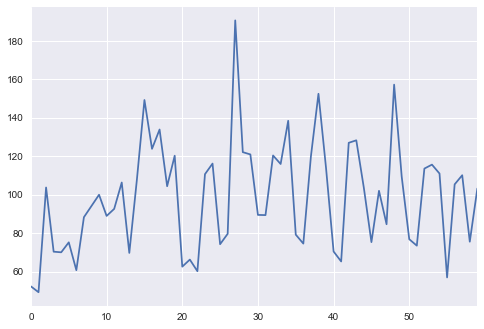

In [46]:
sns.tsplot(Df['Volume'])